This analysis should aim to 'normalize' the transpiration $\left(E_{\text{apparent}}\right)$ for different factors (stomatal conductance, temp, photon flux density, etc.) and then observe the resulting difference between that of the parasitized and unparasitized plants.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
def Read_Array_Data(fileName: str):  # Read and return array from file
    return np.loadtxt(os.path.join(os.path.expanduser('~'), 'pyEnvs',
                      'connorData', 'data', fileName))


def Split_Array(raw, keyArg):  # Split array in two based on a keyword
    for i in range(np.shape(raw)[0]):
        if raw[i][0] == (keyArg / 1):
            limitingIndex = i

    A = np.empty([limitingIndex, 6])
    B = np.empty([np.shape(raw)[0] - (limitingIndex + 1), 6])

    for i in range(np.shape(raw)[0]):
        if i < limitingIndex:
            A[i] = raw[i]
        elif i > limitingIndex:
            B[i - (limitingIndex + 1)] = raw[i]
        else:
            pass

    return [A, B]


def Regression(dataSet, axis1, axis2): # Returns an array for the regression line

    dataSetModel = np.poly1d(np.polyfit(dataSet[axis1], dataSet[axis2], 1))
    dataSim = np.linspace(np.amin(dataSet[axis1]), np.amax(dataSet[axis1]), 10)
    dataModel = dataSetModel(dataSim)  # dataSetModel(dataSim)
    return [dataSim, dataModel]


def Set_Neg_to_Zero(dataSet, index): # Sets negative values of a given data set to 0
    for i in range(np.size(dataSet[index])):
        if dataSet[index][i] < 0:
            dataSet[index][i] = 0
    return dataSet


def Normalize_Data_Subset(dataSet1, dataSet2, index): # Normalize data values to a range of 0-1
    dataMin = np.amin([np.amin(dataSet1[index]), np.amin(dataSet2[index])])
    dataMax = np.amax([np.amax(dataSet1[index]), np.amax(dataSet2[index])])
    for i in range(np.size(dataSet1[index])):
        dataSet1[index][i] = (dataSet1[index][i] - dataMin) / (dataMax - dataMin)
    for i in range(np.size(dataSet2[index])):
        dataSet2[index][i] = (dataSet2[index][i] - dataMin) / (dataMax - dataMin)
    return dataSet1, dataSet2


def Normalize_Complete_Dataset(dataSet1, dataSet2):
    for i in range(6):
        dataSet1[i], dataSet2[i] = Normalize_Data_Subset(dataSet1, dataSet2, i)
    return dataSet1, dataSet2
        


In [14]:
# Variables to control output axes
Qamb = 0
Temp = 1
VPD = 2
VP = 3
E = 4
GSW = 5

# X and Y
X = Qamb
Y = GSW
Z = E

# Regression on/off
regressionDisplay = True

rawDat = Read_Array_Data('GSW_E_VPleaf_VPDleaf_Tleaf_Qamb.txt')
temp = Split_Array(rawDat, -42069)

host = np.rot90(temp[0], k=1)
pHost = np.rot90(temp[1], k=1)

# Set negative GSW values to 0
host = Set_Neg_to_Zero(host, GSW)
pHost = Set_Neg_to_Zero(pHost, GSW)

host, pHost = Normalize_Data_Subset(host, pHost, X)
host, pHost = Normalize_Data_Subset(host, pHost, Y)
host, pHost = Normalize_Data_Subset(host, pHost, Z)

print(host[X])

hostAvg = [np.average(host[X]), np.average(host[Y]), np.average(host[Z])]
pHostAvg = [np.average(pHost[X]), np.average(pHost[Y]), np.average(pHost[Z])]

hostRegression = Regression(host, X, Y)
pHostRegression = Regression(pHost, X, Y)

[0.14533965 0.00789889 0.03791469 0.03238547 0.02685624 0.02922591
 0.0221169  0.0221169  0.00789889 0.00473934 0.01816746 0.
 0.03159558 0.00631912 0.06161137 0.05529226]


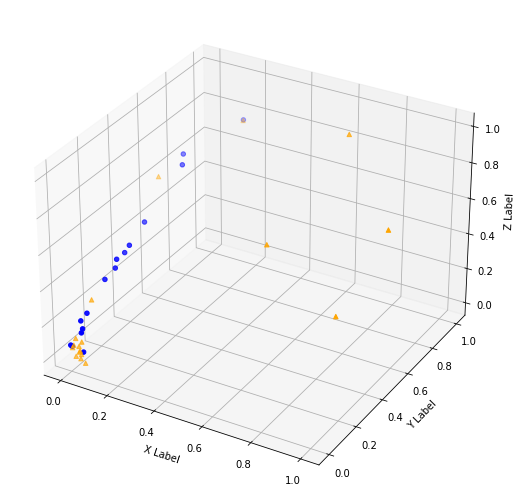

In [16]:
fig = plt.figure()
fig.set_size_inches(12, 9)
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(host[X], host[Y], host[Z], marker='o', color='blue')
ax.scatter(pHost[X], pHost[Y], pHost[Z], marker='^', color='orange')        

In [19]:
plt.show()